# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

Inicialmente se realizara el llamado de las librerías necesarias para poder trabajar con el proyecto, posteriormente se realizará la lectura de los archivos csv, en caso de que la información no se encuentre correctamente formateada se utilizará el parámetro sep para establecer la separación correcta de los datos, se validará si las columnas de los DF ya cuentan con un nombre y en caso de no tenerlo se realizará el nombrado de columnas.

In [2]:
# importar librerías
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
# leer conjuntos de datos en los DataFrames
df_orders          = pd.read_csv('/datasets/instacart_orders.csv', sep=';') 
df_products        = pd.read_csv('/datasets/products.csv', sep=';')
df_aisles          = pd.read_csv('/datasets/aisles.csv', sep=';')
df_departments     = pd.read_csv('/datasets/departments.csv', sep=';')
df_order_products  = pd.read_csv('/datasets/order_products.csv', sep=';')

In [4]:
# mostrar información del DataFrame
df_orders.info()
print('')
print(df_orders.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB

   order_id  user_id  order_number  order_dow  order_hour_of_day  \
0   1515936   183418            11          6                 13   
1   1690866   163593             5          5                 12   
2   1454967    39980             4          5                 19   
3   1768857    82516            56          0                 20   
4   3007858   196724             2          4                 12  

In [5]:
# mostrar información del DataFrame
df_products.info()
print('')
print(df_products.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB

   product_id                                       product_name  aisle_id  \
0           1                         Chocolate Sandwich Cookies        61   
1           2                                   All-Seasons Salt       104   
2           3               Robust Golden Unsweetened Oolong Tea        94   
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
4           5                          Green Chile Anytime Sauce         5   

   department_id  
0             19  
1             13  
2              7  
3              1  
4             13  


In [6]:
# mostrar información del DataFrame
df_aisles.info()
print('')
print(df_aisles.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB

   aisle_id                       aisle
0         1       prepared soups salads
1         2           specialty cheeses
2         3         energy granola bars
3         4               instant foods
4         5  marinades meat preparation


In [7]:
# mostrar información del DataFrame
df_departments.info()
print('')
print(df_departments.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes

   department_id department
0              1     frozen
1              2      other
2              3     bakery
3              4    produce
4              5    alcohol


In [8]:
# mostrar información del DataFrame
df_order_products.info()
print('')
print(df_order_products.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB

   order_id  product_id  add_to_cart_order  reordered
0   2141543       11440               17.0          0
1    567889        1560                1.0          1
2   2261212       26683                1.0          1
3    491251        8670               35.0          1
4   2571142        1940                5.0          1
5   2456893       21616                4.0          1
6    644579       12341                5.0          1
7   2231852       44925               10.0          1
8   3185766       36259               14.0          1
9    420019       23315                4.0          1


## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 1. Descripción de los datos.

Los datos no se encuentran en un formato legible, ya que tanto los datos como las columnas se encuentran separadas por el delimitador ; por ello se debe usar el parámetro sep= con la finalidad de darle el formato adecuado a cada DataFrame

# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.

Para poder validar los datos duplicados se tendrá que analizar cada DataFrame por medio del método duplicated() para poder validar todo el dataframe o por medio del método value_counts() para una fila en específico, una vez validado que si existen valores duplicados se procede a eliminarlos usando  el método drop_duplicates, igualmente se analizará en busca de duplicados implícitos.

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [9]:
# Revisa si hay pedidos duplicados
print(df_orders.duplicated().sum()) #Se filtra el df con el método duplicated para contabilizar los datos duplicados, se usa este método para poder localizar de manera más rápida la cantidad de datos duplicados
print(df_orders[df_orders.duplicated()])

15
        order_id  user_id  order_number  order_dow  order_hour_of_day  \
145574    794638    50898            24          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
266232   1782114   106752             1          3                  2   
273805   1112182   202304            84          3                  2   
284038   2845099    31189            11          3                  2   
311713   1021560    53767             3          3                  2   
321100    408114    68324             4          3                  2   
323900   1919531   191501            32          3                  2   
345917   2232988    82565             1          3                  2   
371905    391768    57671            19          3                  2   
394347    467134    63189            21          3                  2   
411408   1286742   183220            48         

¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?
Todos tienen el mismo número de order_dow y de order_hour_of_day, así como la hora de pedido fue a las 2am, igualmente se detecta la existencia de datos ausentes 

In [10]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
df_orders_filtered = df_orders[df_orders['order_hour_of_day'] == 2] #Se filtran las filas que tienen horario de 2am 
df_orders_filtered.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1004 entries, 145 to 478321
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   order_id                1004 non-null   int64  
 1   user_id                 1004 non-null   int64  
 2   order_number            1004 non-null   int64  
 3   order_dow               1004 non-null   int64  
 4   order_hour_of_day       1004 non-null   int64  
 5   days_since_prior_order  941 non-null    float64
dtypes: float64(1), int64(5)
memory usage: 54.9 KB


¿Qué sugiere este resultado?
Que no todas las ordenes fueron realizadas a las 2am ya que la cantidad de datos duplicados es menor a la cantidad de ordenes realizadas a las 2am, habiendo un total de 15 datos duplicados

In [11]:
# Elimina los pedidos duplicados
df_orders = df_orders.drop_duplicates().reset_index(drop=True) #Se usa el método drop_duplicates() para eliminar los pedidos duplicados y se resetea el index para que no hayan espacios vacíos

In [12]:
# Vuelve a verificar si hay filas duplicadas
df_orders.duplicated().sum() #Se hace la suma de todos los valores duplicados

0

In [13]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedido
df_orders['order_id'].duplicated().sum() #Solo se realiza el filtrado para la columna de id de ordenes

0

Describe brevemente tus hallazgos y lo que hiciste con ellos

Se encontraron datos duplicados, los cuales compartían similudes dentro del día de la semana que se realizó la orden, siendo día miércoles a las 2am, se eliminaron los duplicados con el método duplicated para eliminar las filas

### `products` data frame

In [14]:
# Verifica si hay filas totalmente duplicadas
df_products.duplicated().sum() #Se usa el método duplicated para validar todo el DF

0

In [15]:
# Verifica únicamente si hay IDs duplicadas de productos
df_products['product_id'].duplicated().sum() #Se filtra usando el nombre de la columna para validar si hay valores duplicados y los suma

0

In [16]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
print(df_products['product_name'].str.lower().duplicated().sum())


1361


In [17]:
# Revisa si hay nombres duplicados de productos no faltantes
df_products[(~df_products['product_name'].isna())&(df_products['product_name'].str.lower().duplicated())]

,product_id,product_name,aisle_id,department_id
2058,2059,Biotin 1000 Mcg,47,11
5455,5456,Green Tea With Ginseng and Honey,96,20
5558,5559,Cream Of Mushroom Soup,69,15
7558,7559,Cinnamon Rolls with Icing,105,13
9037,9038,American Cheese slices,21,16
...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Se realizó la validación para encontrar valores duplicados filtrando únicamente por columnas espefícas con la finalidad de encontrar duplicados tanto implicitos como explicitos
Se encontraron nombres de productos duplicados sin embargo no fueron detectados ya que se diferencian al tener mayúsculas y minúsculas, para ello se tuvo que convertir cada nombre en minúscula para que sea una busqueda más precisa, dando un total de 1361 nombres repetidos.

### `departments` data frame

In [18]:
# Revisa si hay filas totalmente duplicadas
df_departments.duplicated().sum()

0

In [19]:
# Revisa únicamente si hay IDs duplicadas de productos
df_merge1 = df_products.merge(df_departments, on='department_id')
print(df_merge1['product_id'].duplicated().sum())

0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Se valida que dentro de la tabla de departments no se encontraron filas duplicadas y al requerir encontrar ids de productos duplicados se hizo un merge para poder combinar ambas tablas, tanto departments como products por medio de la columna del id del departamento, realizando el filtrado no se encontró ningún ID de producto duplicado.

### `aisles` data frame

In [20]:
# Revisa si hay filas totalmente duplicadas
df_aisles.duplicated().sum()

0

In [21]:
# Revisa únicamente si hay IDs duplicadas de productos
df_merge2 = df_products.merge(df_aisles, on='aisle_id')
print(df_merge2['product_id'].duplicated().sum())

0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Dentro de la tabla de pasillos tampoco se encontraron filas o IDs de productos duplicados, se realizó la misma unión de tablas de productos y de pasillos para validar IDs de productos duplicados, sin embargo no se encontró ningun dato repetido

### `order_products` data frame

In [22]:
# Revisa si hay filas totalmente duplicadas
df_order_products.duplicated().sum()

0

In [23]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
df_validation = df_order_products.drop_duplicates(subset='order_id').reset_index(drop=True)


print(df_validation)




        order_id  product_id  add_to_cart_order  reordered
0        2141543       11440               17.0          0
1         567889        1560                1.0          1
2        2261212       26683                1.0          1
3         491251        8670               35.0          1
4        2571142        1940                5.0          1
...          ...         ...                ...        ...
450041   1790509       43739                1.0          1
450042   1274005       38275                1.0          1
450043    812418       46149                1.0          1
450044   2666881         196                1.0          1
450045   1461911       33198                1.0          1

[450046 rows x 4 columns]


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Dentro de la tabla de ordenes de productos no se encontraron datos duplicados sin embargo se realiza una validación para comprobar si no existe algun ID de orden duplicado y así evitar algun duplicado implícito

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [24]:
# Encuentra los valores ausentes en la columna 'product_name'
print(df_products['product_name'].value_counts(dropna=False))

NaN                                                   1258
Lemon Dishwasher Detergent + Clorox Stain Fighting       1
Arctic Cod Liver Oil Lemon                               1
Chocolate Vanilla Pudding                                1
Roasted Peanut Oil                                       1
                                                      ... 
Organic Diced Tomatoes                                   1
Natural Goodness Chicken 100% Fat Free RTS Broth         1
Reduced Fat Original Baked Snack Crackers                1
Organic Apricot Spread                                   1
Starmont Chardonnay                                      1
Name: product_name, Length: 48437, dtype: int64


Describe brevemente cuáles son tus hallazgos.
Se utilizó el método value_counts con el parámetro dropna=False para contar todos los valores de la columna, se percata que existen 1258 valores ausentes

In [25]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?


print(df_products[(df_products['product_name'].isna()) & (df_products['aisle_id'] == 100)]) #Se realiza un filtrado con dos validaciones comprobando si el nombre del producto es ausente y el pasillo es 100

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


Describe brevemente cuáles son tus hallazgos.
Realizando un filtrado validando las filas que tienen un valor ausente en la columna product_name y validando si esta relacionada al id 100, mostrando el resultado se muestra un total de 1258 filas que es el total de datos ausentes así que si, estan relacionados al mismo ID de pasillo.

In [26]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
print(df_products[(df_products['product_name'].isna()) & (df_products['department_id'] == 21)])

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


Describe brevemente cuáles son tus hallazgos.

Posterior al filtrado se valida que en efecto los productos si se encuentran vinculados al departamento número 21 

In [27]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
print(df_aisles.iloc[99])
print("")
print(df_departments.iloc[20])

aisle_id        100
aisle       missing
Name: 99, dtype: object

department_id         21
department       missing
Name: 20, dtype: object


Describe brevemente cuáles son tus hallazgos.
Ambos casos, tanto la tabla de aisle como la tabla de department no cuentan con información en esa fila, se muestra como "missing" por ello es que en product se visualiza como dato ausente ya que no un información para asignar

In [28]:
# Completa los nombres de productos ausentes con 'Unknown'
df_products['product_name'] = df_products['product_name'].fillna('Unknown')

print(df_products['product_name'].value_counts(dropna = False))


Unknown                                             1258
Moisturizing Cream Body Wash Fresh Fig                 1
For Chicken Marinade                                   1
Arctic Cod Liver Oil Lemon                             1
Chocolate Vanilla Pudding                              1
                                                    ... 
Natural Goodness Chicken 100% Fat Free RTS Broth       1
Reduced Fat Original Baked Snack Crackers              1
Organic Apricot Spread                                 1
Spicy Chili Beans                                      1
Starmont Chardonnay                                    1
Name: product_name, Length: 48437, dtype: int64


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Se encontraron datos ausentes dentro de la tabla de productos, se hizo un análisis para encontrar un motivo ya que comparte un vínculo con dos tablas más, aisle y department, al realizar una consulta y ver en que coincidian se percata que tanto aisle como department no cuentan con un dato que pueda ser asignado, se muestra como missing, por ello se tuvo que modificar la tabla de products, para modificar esos datos ausentes como datos desconocidos "Unknown"

### `orders` data frame

In [29]:
# Encuentra los valores ausentes
print(df_orders.isna().sum())


order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64


In [30]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
df_filtered = df_orders.query("order_id in @df_order_products.order_id and @df_order_products.reordered == 1") #Se realiza un filtrado utilizando un query para poder comprobar si el id de orden se encuentra dentro de la tabla de ordenes de productos y posteriormente se hace la validación para comprobar si la columna de reordered equivale a 1 para comprobar que no ha sido el primer pedido
print(df_filtered.isna().sum())



order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    17048
dtype: int64


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Se valida que si hay valores ausentes dentro de la tabla, dando un total de 28817 posteriormente a ello se realiza una consulta por medio de query para comprobar si el número de orden está presente en la tabla orders y order_products adicional a ello se hace la validación si el producto ha sido reordenado, una vez filtrado se cuenta la cantidad de valores ausentes dando un total de 17066 valores ausentes que no son el primer pedido de los clientes.

### `order_products` data frame

In [31]:
print(df_order_products.isna().sum() ) # Encuentra los valores ausentes

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


In [32]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
print(df_order_products['add_to_cart_order'].min())
print(df_order_products['add_to_cart_order'].max())

1.0
64.0


Describe brevemente cuáles son tus hallazgos.

Se encuentra que dentro de la tabla order_products existen 836 datos ausentes, comparando los valores mínimos y máximos se percata que hay un rango de orden para añadir los productos al carrito entre 1 hasta la posición 64

In [33]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'

order_prod_na = df_order_products[df_order_products['add_to_cart_order'].isna()] #Se filtra para guardar solo aquellas filas que tengan valores ausentes en la columna add_to_cart_order

print(order_prod_na['order_id']) #Se muestra solo la columna de las IDs


737        2449164
9926       1968313
14394      2926893
16418      1717990
30114      1959075
            ...   
4505662    1800005
4511400    1633337
4517562     404157
4534112    1673227
4535739    1832957
Name: order_id, Length: 836, dtype: int64


In [34]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
df_filtered = df_order_products[df_order_products['add_to_cart_order'].isna()]['order_id']

df_filtered = df_order_products[df_order_products['order_id'].isin(df_filtered)]
print(df_filtered.groupby('order_id')['product_id'].count().sort_values(ascending=False))



order_id
61355      127
3308010    115
2136777    108
171934     104
1959075     98
          ... 
888470      65
1598369     65
747668      65
1677118     65
9310        65
Name: product_id, Length: 70, dtype: int64


Describe brevemente cuáles son tus hallazgos. 
En efecto todos los pedidos con valores ausentes cuentan con más de 64 pedidos

In [35]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
df_order_products['add_to_cart_order'] = df_order_products['add_to_cart_order'].fillna(999)
df_order_products['add_to_cart_order'] = df_order_products['add_to_cart_order'].astype('int')

Describe brevemente tus hallazgos y lo que hiciste con ellos.

Se validó que existen datos ausentes dentro de la columna add_to_cart_order, por ello se tuvo que realizar el llenado con la información solicitada y el cambio de tipo de dato a tipo entero puesto que no hay algun número decimal 

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos

Es importante realizar el eliminado de valores ausentes y de valores duplicados, se debe revisar la información utilizando los métodos adecuados para poder contar con los datos correctos.
En este caso el DataFrame si contó con una cantidad grande de datos duplicados por ello fue importante procesarlos para evitar cualquier tipo de irregularidad a la hora de presentar los datos.

# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [36]:
print(df_orders['order_hour_of_day'].value_counts().sort_index())

0      3180
1      1763
2       989
3       770
4       765
5      1371
6      4215
7     13043
8     25024
9     35896
10    40578
11    40032
12    38034
13    39007
14    39631
15    39789
16    38112
17    31930
18    25510
19    19547
20    14624
21    11019
22     8512
23     5611
Name: order_hour_of_day, dtype: int64


In [37]:
print(df_orders['order_dow'].value_counts().sort_index())

0    84090
1    82185
2    65833
3    60897
4    59810
5    63488
6    62649
Name: order_dow, dtype: int64


Escribe aquí tus conclusiones

Se realiza la validación y los datos de la columna order_hour_of_day si están en un rango de 0 a 23 y los datos de la columna order_dow si se encuentran en un rango de 0 a 6

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

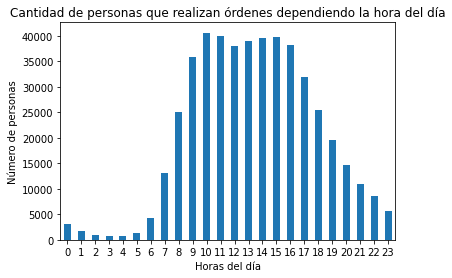

In [38]:


df_orders.groupby('order_hour_of_day')['user_id'].count().plot(
    title='Cantidad de personas que realizan órdenes dependiendo la hora del día',
    x='order_hour_of_day',
    y='user_id',
    xlabel= 'Horas del día',
    ylabel='Número de personas',
    legend = False,
    kind='bar',
    rot = 0
)

plt.show()

Escribe aquí tus conclusiones

Las personas hacen más ordenes en un horario de 8 horas a 18 horas, teniendo como pico de pedidos las 10 horas, así mísmo hay actividad muy baja durante las primeras horas del día, de 0 a 6 horas 

### [A3] ¿Qué día de la semana compran víveres las personas?

<AxesSubplot:title={'center':'Número total de órdenes por día de la semana, 0 representa el día domingo'}, xlabel='Días de la semana', ylabel='Número de compras'>

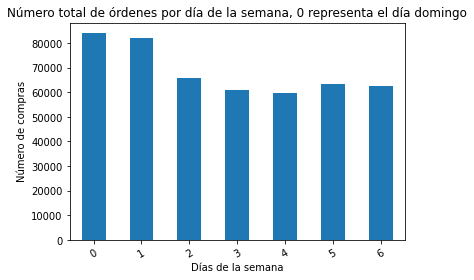

In [39]:

df_orders.groupby('order_dow')['user_id'].count().plot(
    title='Número total de órdenes por día de la semana, 0 representa el día domingo',
    x='order_dow',
    y='user_id',
    xlabel= 'Días de la semana',
    ylabel='Número de compras',
    legend = False,
    kind='bar',
    rot = 30
)

Escribe aquí tus conclusiones
Se valida que los clientes realizan mas compras en día domingo seguido del día lunes

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

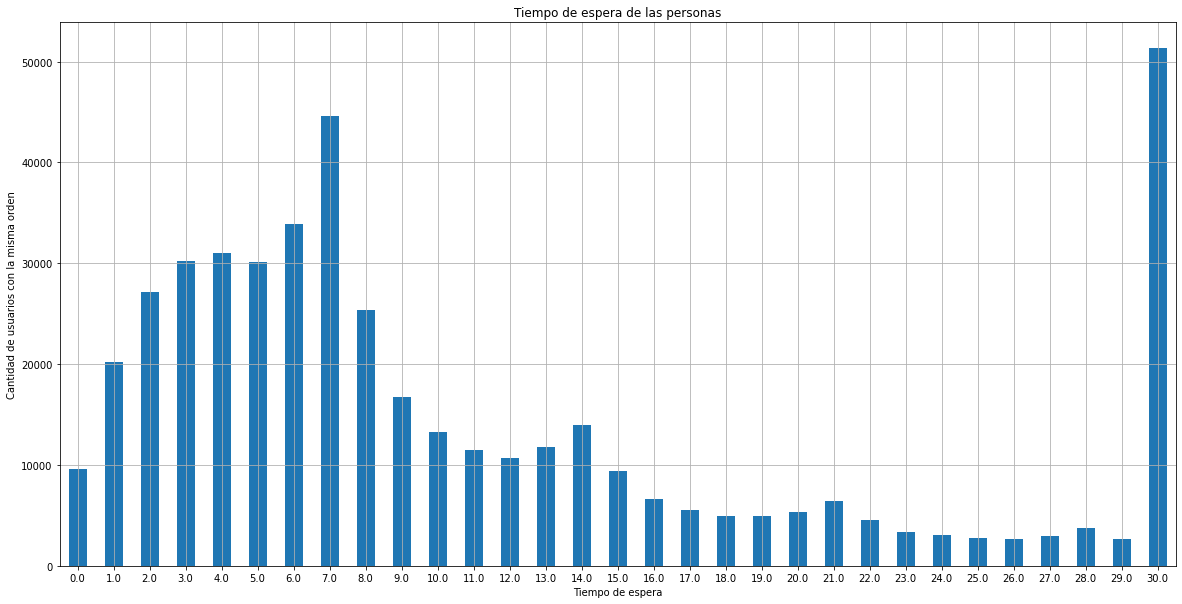

In [40]:
orders_time = df_orders['days_since_prior_order'].value_counts().sort_index().plot(
kind = 'bar',
    title = 'Tiempo de espera de las personas',
    ylabel= 'Cantidad de usuarios con la misma orden',
    xlabel = 'Tiempo de espera',
    grid = True,
    rot = 0,
    figsize = [20,10]
)
#orders_time

Escribe aquí tus conclusiones

Los días máximos que tienden a esperar las personas para volver a realizar un pedido son 30 días, posteriormente se valida que también tienden a esperar una semana o 7 días, como contraparte muy pocas personas tienen a esperar de 15 a 29 días

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [41]:
df_filtered = df_orders[(df_orders['order_dow'] == 3) | (df_orders['order_dow'] == 6)]


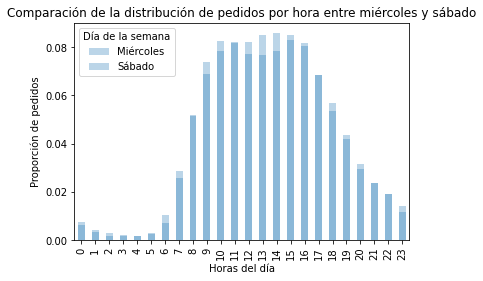

In [42]:
fig, ax = plt.subplots()


for name, group in df_filtered.groupby('order_dow'):
    group['order_hour_of_day'].value_counts(normalize=True).sort_index().plot(
        ax=ax, 
        kind='bar', 
        alpha=0.3,  # Makes the bars slightly transparent for better visibility
        label=f'Day {name}'
    )


ax.set_xlabel('Horas del día')
ax.set_ylabel('Proporción de pedidos')
ax.set_title('Comparación de la distribución de pedidos por hora entre miércoles y sábado')
ax.legend(title='Día de la semana', labels=['Miércoles', 'Sábado'])

Escribe aquí tus conclusiones

Para ambos días hay una diferencia en la orden de perdidos de las 12 horas a las 14 horas

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

<AxesSubplot:title={'center':'Numero de veces que un cliente ha realizado un pedido'}, xlabel='Número de ordenes', ylabel='Número de usuarios'>

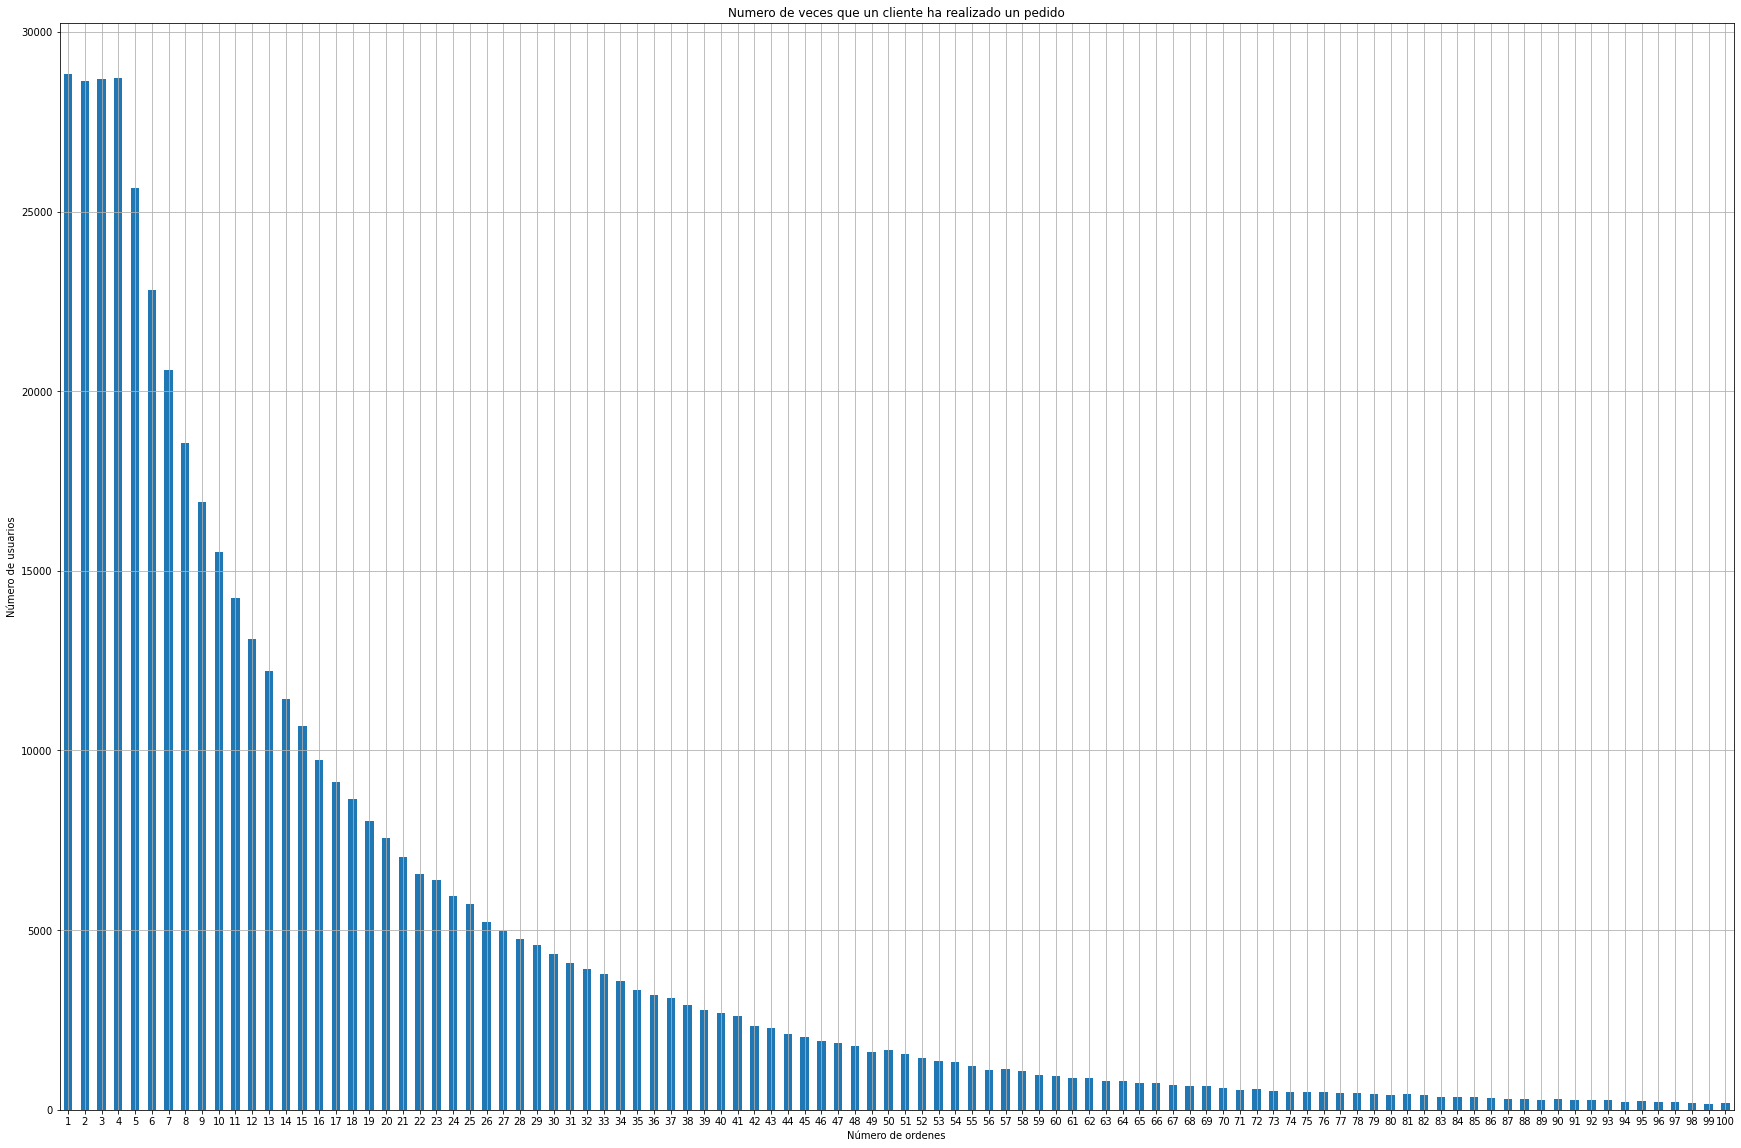

In [43]:
df_orders.groupby('order_number')['user_id'].count().plot(
    kind = 'bar',
    title = 'Numero de veces que un cliente ha realizado un pedido',
    xlabel = 'Número de ordenes',
    ylabel = 'Número de usuarios',
    figsize = [30,20],
    rot = 0,
    legend = False,
    grid = True
)

Escribe aquí tus conclusiones

De acuerdo a la gráfica mostrada, se puede validar que en su mayoría de clientes ha realizado menos de 50 pedidos, son muy pocos los usuarios que han realizado más de esa cantidad, se destaca que muchos clientes han realizado al menos un pedido.

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [44]:
#unir products con order_products
df_top_products = df_products.merge(df_order_products, on = 'product_id')

In [45]:
#conteo sobre los productos
df_top_products = df_top_products.groupby(['product_id','product_name'])['product_name'].count().sort_values(ascending=False)
print(df_top_products.iloc[0:20])

product_id  product_name            
24852       Banana                      66050
13176       Bag of Organic Bananas      53297
21137       Organic Strawberries        37039
21903       Organic Baby Spinach        33971
47209       Organic Hass Avocado        29773
47766       Organic Avocado             24689
47626       Large Lemon                 21495
16797       Strawberries                20018
26209       Limes                       19690
27845       Organic Whole Milk          19600
27966       Organic Raspberries         19197
22935       Organic Yellow Onion        15898
24964       Organic Garlic              15292
45007       Organic Zucchini            14584
39275       Organic Blueberries         13879
49683       Cucumber Kirby              13675
28204       Organic Fuji Apple          12544
5876        Organic Lemon               12232
8277        Apple Honeycrisp Organic    11993
40706       Organic Grape Tomatoes      11781
Name: product_name, dtype: int64


Escribe aquí tus conclusiones

Una vez realizado el filtrado se percata que la mayoría de pedidos más populares son productos orgánicos

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

<AxesSubplot:title={'center':'Numero de productos por cada orden realizada'}, xlabel='Productos', ylabel='Pedidos'>

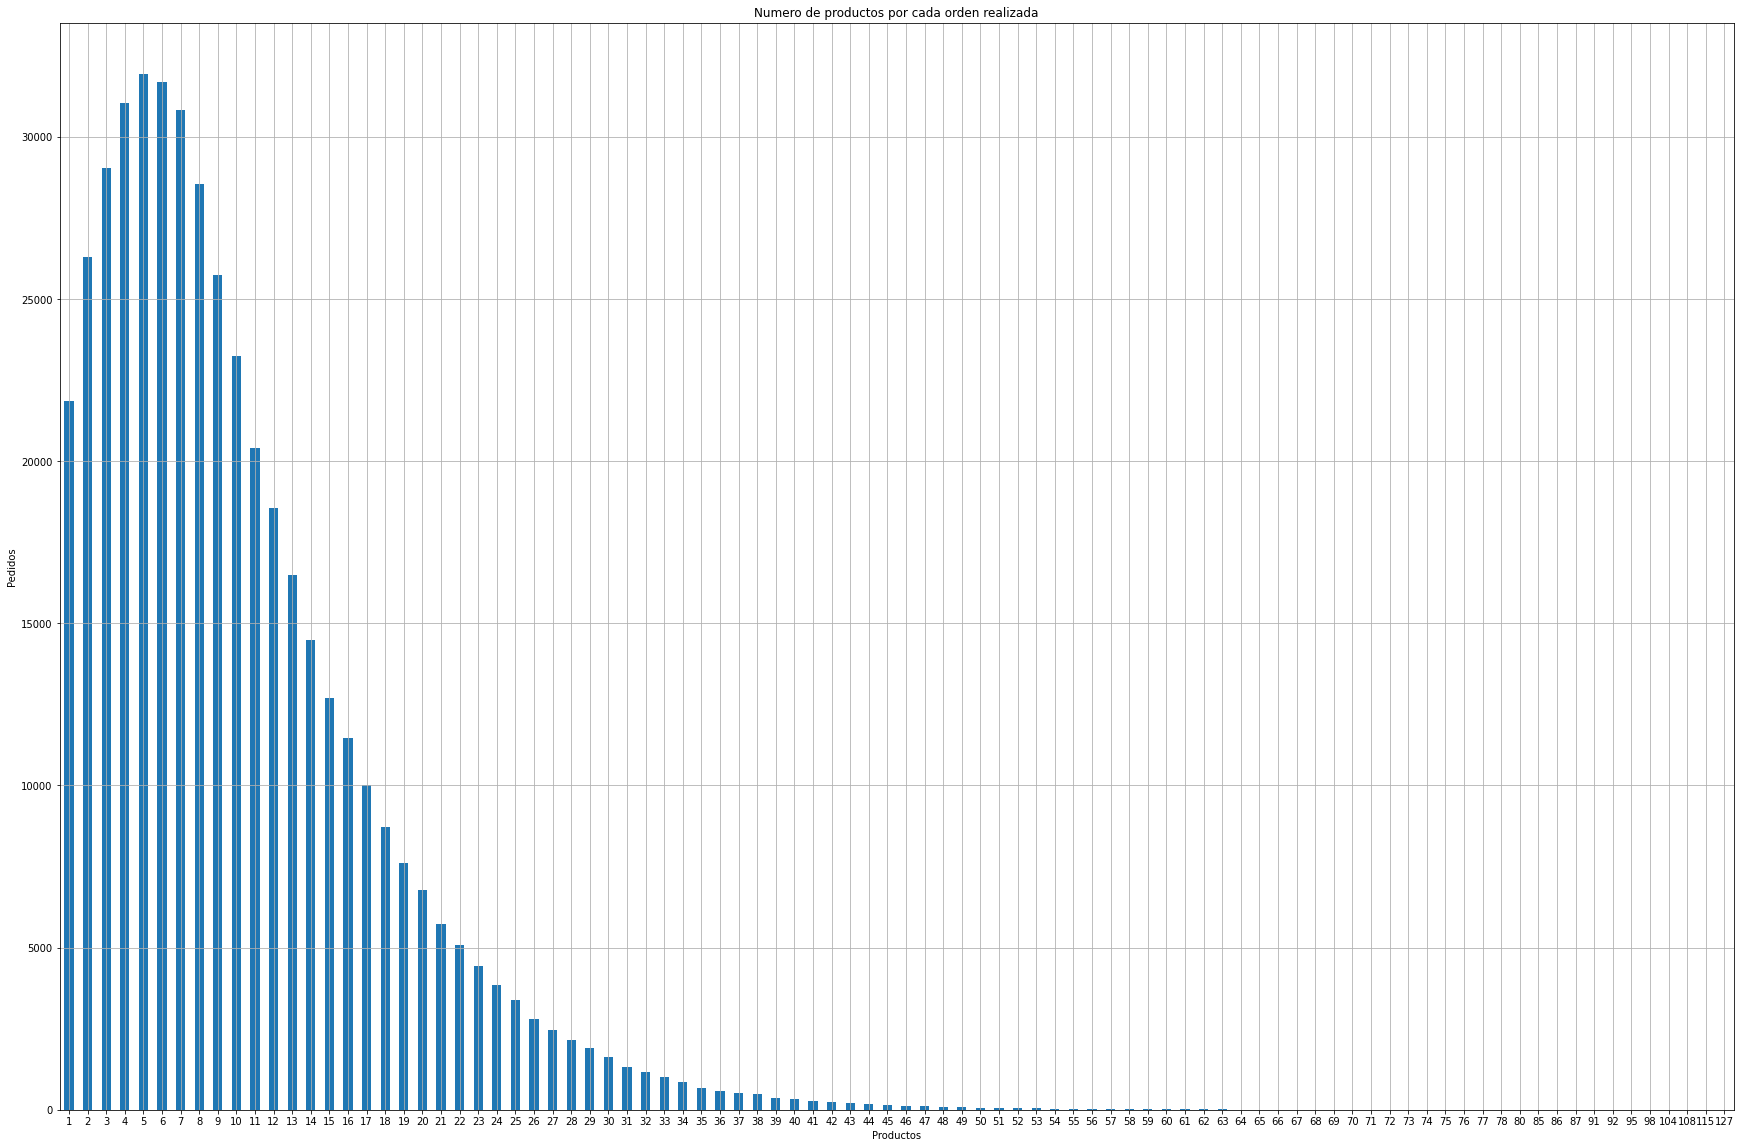

In [52]:
df_order_products.groupby('order_id')['product_id'].count().value_counts().sort_index().plot(
    kind = 'bar',
    title = 'Numero de productos por cada orden realizada',
    xlabel = 'Productos',
    ylabel = 'Pedidos',
    figsize = [30,20],
    rot = 0,
    legend = False,
    grid = True
)

In [47]:
plt.show()

Escribe aquí tus conclusiones

Se valida que la mayor parte de pedidos tieden a tener de 1 a 22 productos, los pedidos que tienen más de 23 productos son muy pocos e incluso los pedidos que tienen más de 50 productos so 

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [48]:
#df_products y df_order_products 

df_merged = df_products.merge(df_order_products[df_order_products['reordered'] == 1], on='product_id')

In [49]:
df_merged = df_merged.groupby(['product_id','product_name'])['product_name'].count().sort_values(ascending=False)
print(df_merged.iloc[0:20])

product_id  product_name            
24852       Banana                      55763
13176       Bag of Organic Bananas      44450
21137       Organic Strawberries        28639
21903       Organic Baby Spinach        26233
47209       Organic Hass Avocado        23629
47766       Organic Avocado             18743
27845       Organic Whole Milk          16251
47626       Large Lemon                 15044
27966       Organic Raspberries         14748
16797       Strawberries                13945
26209       Limes                       13327
22935       Organic Yellow Onion        11145
24964       Organic Garlic              10411
45007       Organic Zucchini            10076
49683       Cucumber Kirby               9538
28204       Organic Fuji Apple           8989
8277        Apple Honeycrisp Organic     8836
39275       Organic Blueberries          8799
5876        Organic Lemon                8412
49235       Organic Half & Half          8389
Name: product_name, dtype: int64


Escribe aquí tus conclusiones

La mayoria de pedidos más populares son los que tienen a pedirse con mayor frecuencia, igualmente la mayoria tienden a ser productos orgánicos

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [50]:
#Se combinan DF y se consulta el promedio
df_prod_mean = df_products.merge(df_order_products, on='product_id')

In [51]:
df_prod_mean.groupby('product_id')['reordered'].mean().sort_values(ascending=False)

product_id
14721    1.0
20949    1.0
6723     1.0
6732     1.0
45088    1.0
        ... 
10485    0.0
37690    0.0
10484    0.0
10474    0.0
42984    0.0
Name: reordered, Length: 45573, dtype: float64

Escribe aquí tus conclusiones

Parte de los productos se vuelven a pedir

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [52]:
df_reorder_prod = df_orders.merge(df_order_products, on='order_id')
df_reorder_prod.groupby(['user_id'])['reordered'].mean()

user_id
2         0.038462
4         0.000000
5         0.666667
6         0.000000
7         0.928571
            ...   
206203    0.222222
206206    0.714286
206207    0.891304
206208    0.696000
206209    0.320000
Name: reordered, Length: 149626, dtype: float64

Escribe aquí tus conclusiones

La mayoría de clientes ya había solicitado los productos adquiridos


### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [53]:
df_order_list = df_order_products[df_order_products['add_to_cart_order'] == 1].merge(df_products, on='product_id')
df_order_list = df_order_list.groupby(['product_id','product_name'])['product_name'].count().sort_values(ascending=False)

print(df_order_list.iloc[0:20].sort_values(ascending=False))

product_id  product_name               
24852       Banana                         15562
13176       Bag of Organic Bananas         11026
27845       Organic Whole Milk              4363
21137       Organic Strawberries            3946
47209       Organic Hass Avocado            3390
21903       Organic Baby Spinach            3336
47766       Organic Avocado                 3044
19660       Spring Water                    2336
16797       Strawberries                    2308
27966       Organic Raspberries             2024
44632       Sparkling Water Grapefruit      1914
49235       Organic Half & Half             1797
47626       Large Lemon                     1737
196         Soda                            1733
38689       Organic Reduced Fat Milk        1397
26209       Limes                           1370
12341       Hass Avocados                   1340
5785        Organic Reduced Fat 2% Milk     1310
27086       Half & Half                     1309
43352       Raspberries      

Escribe aquí tus conclusiones

Las bananas son el producto que se coloca inicialmente en el carrito seguido de productos orgánicos, algunos productos que son populares también tienden a ser los primeros que añaden las personas a su carrito.

### Conclusion general del proyecto:

El formateo de los dataframes es importante para poder realizar una lectura y análisis adecuado de los datos, así mísmo, es importante procesar la información en busqueda de datos ausentes o repetidos
Las personas tienden a tener una taza más alta de pedidos durante el día domingo, igualmente el producto más solicitado por todos los usuarios son las bananas.
Igualmente se percata que los usuarios al menos realizan de 1 a 3 pedidos en su mayoría e incluso el tiempo de espera para realizar una orden suele variar esperando 7 días o 30 días en su mayoría.